Since I lived in Boston and it's very close to my heart, I looked for it in the dataset and luckily found it


Query used to find the country name -

`Select *
from city_list`

Query used to find the city name in United States - 

`Select distinct city 
from city_list 
where country = 'United States'
order by city`

Query used to extract data about Boston - 

`Select * 
from city_data
where city = 'Boston' `

Query used to extract global data -

`Select *
from global_data`

In [1]:
#import numpy and pandas
import numpy as np
import pandas as pd

In [2]:
#read the dataset downloaded for Boston
boston_data = pd.read_csv('Boston.csv')

In [3]:
#read the dataset downloaded for global temperature average
global_data = pd.read_csv('Global data.csv')

In [4]:
boston_data.head()

,year,city,country,avg_temp
0,1743,Boston,United States,1.19
1,1744,Boston,United States,9.63
2,1745,Boston,United States,-1.37
3,1746,Boston,United States,NaN
4,1747,Boston,United States,NaN


In [5]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [6]:
#Counting null values in the dataframes
boston_data.isna().sum()

year        0
city        0
country     0
avg_temp    5
dtype: int64

In [7]:
#Counting null values in the dataframes
global_data.isna().sum()

year        0
avg_temp    0
dtype: int64

In [8]:
#max and min for each column in the dataset
boston_data.max()

year                 2013
city               Boston
country     United States
avg_temp            10.38
dtype: object

In [9]:
boston_data.min()

year                 1743
city               Boston
country     United States
avg_temp            -2.31
dtype: object

In [10]:
#max and min for each column in the dataset
global_data.max()

year        2015.00
avg_temp       9.83
dtype: float64

In [11]:
global_data.min()

year        1750.00
avg_temp       5.78
dtype: float64

In [12]:
#There are null values in the boston dataset, replacing those values with average value 
from statistics import mode
boston_data['avg_temp'] = boston_data['avg_temp'].fillna((boston_data['avg_temp'].mean()))
boston_data['avg_temp'] = boston_data['avg_temp'].round(2)

In [13]:
#join the two datasets on year
data = pd.merge(global_data, boston_data, on='year')

In [14]:
data.head()

,year,avg_temp_x,city,country,avg_temp_y
0,1750,8.72,Boston,United States,7.88
1,1751,7.98,Boston,United States,8.60
2,1752,5.78,Boston,United States,0.36
3,1753,8.39,Boston,United States,7.35
4,1754,8.47,Boston,United States,7.75


In [15]:
data = data.drop(['city', 'country'], axis=1)

In [16]:
#rename column names
data = data.rename(index=str, columns={'avg_temp_x': "global_avg", "avg_temp_y": "boston_avg"})

In [17]:
data.head()

,year,global_avg,boston_avg
0,1750,8.72,7.88
1,1751,7.98,8.60
2,1752,5.78,0.36
3,1753,8.39,7.35
4,1754,8.47,7.75


In [18]:
#average temperatures
boston_avg_temp = data['boston_avg'].mean()
global_avg_temp = data['global_avg'].mean()

In [19]:
#average boston temperature
round(boston_avg_temp, 2)

7.3

In [20]:
#average global temperature
round(global_avg_temp, 2)

8.36

In [21]:
#use rolling mean to get the rolling mean of 10 years
data['global_MA'] = data['global_avg'].rolling(50).mean()
data['boston_MA'] = data['boston_avg'].rolling(50).mean()

In [22]:
data.head()

,year,global_avg,boston_avg,global_MA,boston_MA
0,1750,8.72,7.88,NaN,NaN
1,1751,7.98,8.60,NaN,NaN
2,1752,5.78,0.36,NaN,NaN
3,1753,8.39,7.35,NaN,NaN
4,1754,8.47,7.75,NaN,NaN


In [23]:
#15 warmest years wrt avg temperature
boston_top15 = data.nlargest(15, 'boston_avg')
global_top15 = data.nlargest(15, 'global_avg')
global_boston_top15 = data.nlargest(15, ('global_avg', 'boston_avg'))

In [24]:
boston_top15

,year,global_avg,boston_avg,global_MA,boston_MA
263,2013,9.61,10.38,9.0376,8.2378
262,2012,9.51,10.06,9.0226,8.1790
248,1998,9.52,9.63,8.7822,8.0030
260,2010,9.70,9.58,8.9930,8.0960
256,2006,9.53,9.48,8.9218,8.0438
203,1953,8.87,9.33,8.4990,7.6728
199,1949,8.59,9.30,8.4800,7.5932
249,1999,9.29,9.30,8.7962,8.0030
240,1990,9.23,9.20,8.7198,7.9494
261,2011,9.52,9.12,9.0074,8.1196


In [25]:
global_top15

,year,global_avg,boston_avg,global_MA,boston_MA
257,2007,9.73,8.36,8.9418,8.0408
255,2005,9.70,8.56,8.8968,8.0032
260,2010,9.70,9.58,8.9930,8.0960
263,2013,9.61,10.38,9.0376,8.2378
252,2002,9.57,9.02,8.8470,8.0276
253,2003,9.53,7.78,8.8602,7.9966
256,2006,9.53,9.48,8.9218,8.0438
248,1998,9.52,9.63,8.7822,8.0030
261,2011,9.52,9.12,9.0074,8.1196
259,2009,9.51,8.07,8.9706,8.0606


In [26]:
global_boston_top15

,year,global_avg,boston_avg,global_MA,boston_MA
262,2012,9.51,10.06,9.0226,8.1790
248,1998,9.52,9.63,8.7822,8.0030
260,2010,9.70,9.58,8.9930,8.0960
256,2006,9.53,9.48,8.9218,8.0438
261,2011,9.52,9.12,9.0074,8.1196
255,2005,9.70,8.56,8.8968,8.0032
258,2008,9.43,8.53,8.9550,8.0674
259,2009,9.51,8.07,8.9706,8.0606
253,2003,9.53,7.78,8.8602,7.9966
30,1780,9.43,7.26,NaN,NaN


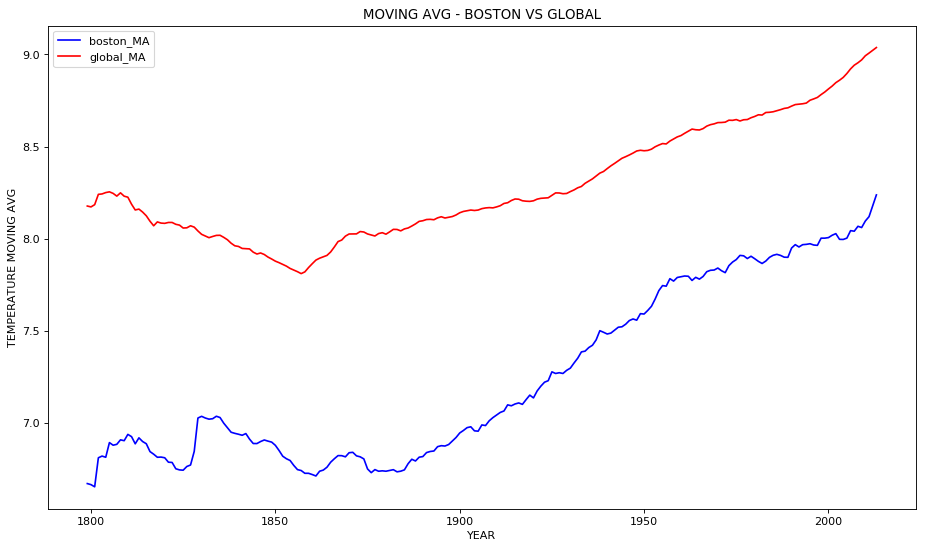

In [33]:
#plot both the moving averages for comparison 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
year = data['year']
boston = data['boston_MA']
global_ = data['global_MA']

plt.plot(year, boston, color='b')
plt.plot(year, global_, color='r')

plt.legend()
plt.xlabel('YEAR')
plt.ylabel('TEMPERATURE MOVING AVG')
plt.title('MOVING AVG - BOSTON VS GLOBAL')
plt.show()

In [28]:
data['diff_MA'] = data['global_MA']-data['boston_MA']

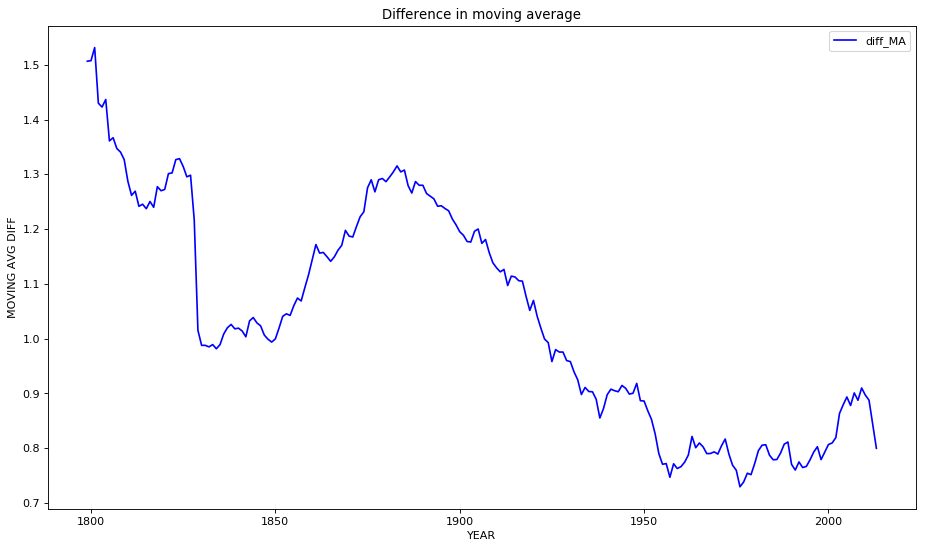

In [29]:
#plot both the difference in moving averages for comparison 
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
year = data['year']
moving_diff = data['diff_MA']

plt.plot(year, moving_diff, color='b')
plt.legend()
plt.xlabel('YEAR')
plt.ylabel('MOVING AVG DIFF')
plt.title('Difference in moving average')
plt.show()

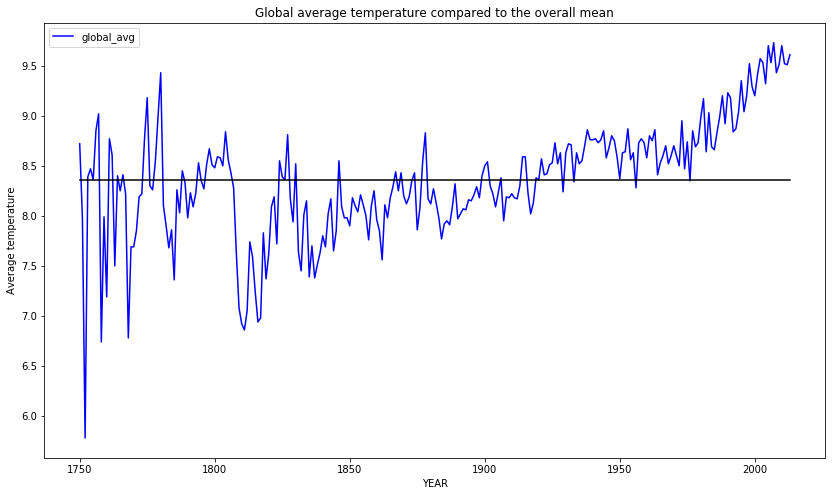

In [30]:
#plot both the difference in moving averages for comparison 
figure(num=None, figsize=(14, 8))
year = data['year']
avg = data['global_avg']
#avg_b = data['boston_avg']
mean_avg_temp = [np.mean(avg)]*len(year)

plt.plot(year, avg, color='b')
plt.plot(year, mean_avg_temp, color='black')
#plt.plot(year, avg_b, color='r')
plt.legend()
plt.xlabel('YEAR')
plt.ylabel('Average temperature')
plt.title('Global average temperature compared to the overall mean')
plt.show()

In [31]:
#correlation coefficient between boston avg temperature and global avg temperature
correlation_coef = np.corrcoef(data['boston_avg'], data['global_avg'])

In [32]:
correlation_coef

array([[1.        , 0.57389172],
       [0.57389172, 1.        ]])

Observations from the above plots and  -
1. Boston, being closer to the Atlantic experiences comparitively colder temperatures than the global average temperature (reference from overall average global temperature and overall average temperature in Boston)
2. The difference in the 50 years moving average globally vs that in Boston is decreasing since the begining of the 20th century and has reduced even more at the start of 21st century
3. The average gobal temperature is rising and a similar trend is observed in the average temperature in Boston
4. 7 of the 15 most avg warmest years in Boston are in the 21st century, whereas 12 of the 15 most warmest years experienced globally are in the 21st century
5. Global average temperature has been higher than the average global temperature from the mid 20th century and has been increasing since then

Further, we can use linear regression to find the average temperature in Boston using regression